# EE 440 HW2
### Cynthia Li 1839952

In [1]:
# This is the import cell
import numpy as np
import cv2
import matplotlib.pyplot as plt

(384, 256)
96.0
64.0


Text(0.5, 1.0, 'interpolation')

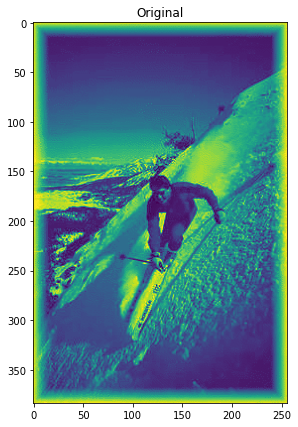

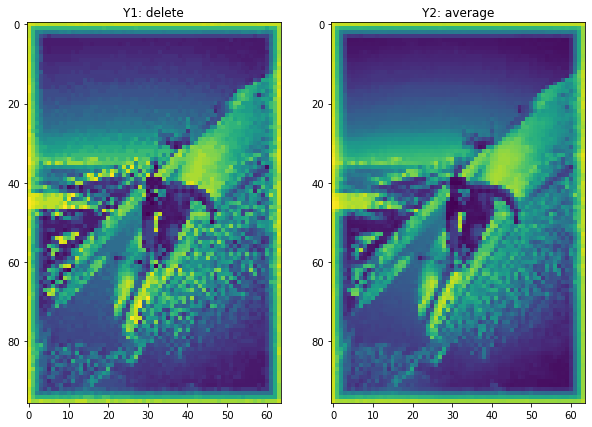

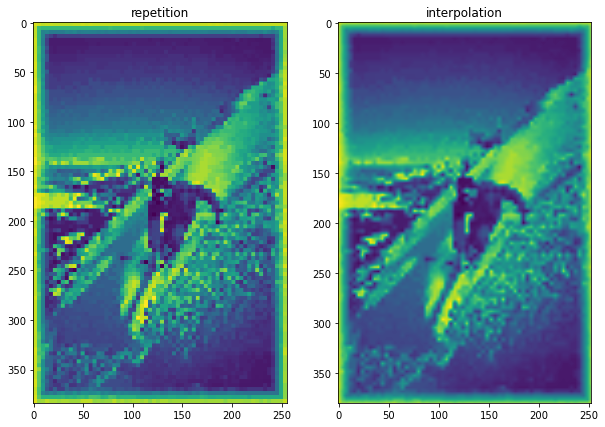

In [2]:
# Problem 1

## To display multiple pictures
fig1 = plt.figure(figsize=(10, 7))

## Display the original picture
X = np.loadtxt('2_1.asc')
X_scaled = X / 255
plt.imshow(X_scaled)
plt.title("Original")

# a. Reduce the resolution of X_scaled by a factor of 4
## check the size of the original picture
print(np.shape(X_scaled))

# i. Reduce by keeping only 1 dot out of the 4*4 square
Y1 = X[1:384:4, 1:256:4]
fig2 = plt.figure(figsize=(10, 7))
fig2.add_subplot(1, 2, 1)  ## display the reduced picture Y1 as "delete"
plt.imshow(Y1)
plt.title("Y1: delete")

# ii. Reduce by keeping the average of each 4*4 square of the X_scaled
print (384 / 4)
print (256 / 4)
Y2 = np.zeros((96, 64))

for i in range (96):
    for j in range (64):
        Y2[i][j] = np.average(X_scaled[4 * i : 4 * i + 3, 4 * j : 4 * j + 3])
        
## display the reduced picture Y1 as "delete"
fig2.add_subplot(1, 2, 2)
plt.imshow(Y2)
plt.title("Y2: average")


# b. Enlargement of pictures using two different methods

# i. Enlargement with pixel repitition
Z1 = np.zeros((384, 256))
## each pixel in Y1 equals a 4*4 square in Z1
for i in range (96):
    for j in range (64):
        for y in range (4):
            ## each pixel in the 4*4 square equals to the pixel in Y1
            for x in range (4):
                Z1[4 * i + y][ 4 * j + x] = Y1[i][j]

## display the enlarged picture as "repitition"
fig3 = plt.figure(figsize=(10, 7))
fig3.add_subplot(1, 2, 1)
plt.imshow(Z1)
plt.title("repetition")

# ii. Enlargement with bilinear interpolation
def interpolation(a, b, w, factor):
    '''
    a is the first value, b is the second value
    w is the current position comparative to a, factor is the weight factor
    
    the interpolated value of current position w will be returned
    '''
    value = ((factor - w) / factor) * a + (w / factor) * b
    return value

def bilinear_enlargement(img, factor):
    '''
    img is the image being processed, 
    factor is the enlargement factor that applies to both horizontal and vertical
    
    a new image enlarged from img result will be returned
    '''
    height_old = img.shape[0]
    width_old = img.shape[1]
    
    height_new = (height_old - 1) * factor
    width_new = (width_old - 1) * factor
    
    horizon = np.zeros((height_old, width_new))
    vertical = np.zeros((height_new, width_new))
    
    ## interpolate the values horizontally
    for j in range(height_old):
        for i in range (width_old - 1):
            pre = img[j][i]
            cur = img[j][i+1]
            for x in range(factor):
                x_value = interpolation(pre, cur, x, factor)
                horizon[j][i*factor+x] =  x_value
    
    ## interpolate the values vertically
    for j in range (height_old - 1):
        for i in range (width_new):
            pre = horizon[j][i]
            cur = horizon[j+1][i]
            for y in range (factor):
                y_value = interpolation(pre, cur, y, factor)
                vertical[j*factor+y][i] = y_value
            
    return vertical

Z2 = bilinear_enlargement(Y1, 4)
            
fig3.add_subplot(1, 2, 2)  ## display the enlarged picture as "repitition"
plt.imshow(Z2)
plt.title("interpolation")

(512, 512)


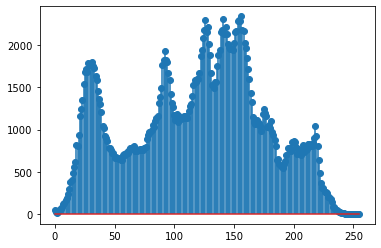

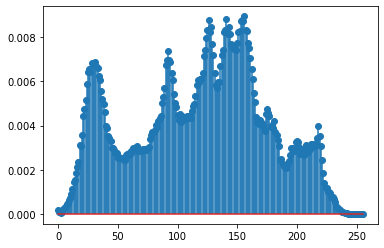

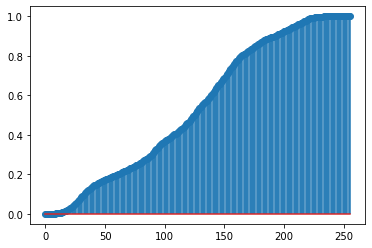

In [13]:
# Problem 2

# a. create the histogram of one of Lena's band
lena = cv2.imread('2_2.bmp', 0)
print(np.shape(lena))
band = np.zeros((512, 512))

for i in range(lena.shape[0]):
    for j in range(lena.shape[1]):
        band[i, j] = lena[i, j]

I2 = band.flatten()
gray_scale = np.zeros(256)

for i in range (len(I2)):
    gray_scale[int(I2[i])] += 1

plt.stem(gray_scale)
plt.show()

# create pdf function
pdf = np.zeros(256)
for i in range(len(gray_scale)):
    pdf[i] = gray_scale[i] / (band.shape[0] * band.shape[1])
plt.stem(pdf)
plt.show()

# create cdf function
cdf = gray_scale
temp_sum = 0
for i in range(1, 256):
    temp_sum = temp_sum + cdf[i]
    cdf[i] = temp_sum
## normalization
cdf = cdf / np.max(cdf)
plt.stem(cdf)
plt.show()